<a href="https://colab.research.google.com/github/bekka9/numerical-methods-for-solving-the-Cauchy-problem/blob/main/chisl8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

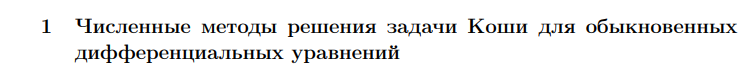

Двухэтапный явный метод Рунге-Кутты с постоянным шагом

In [ ]:
from os import R_OK
import numpy as np
import sympy as sp
from scipy. integrate import odeint

from scipy.integrate import solve_ivp
y_t = [0.7163088348985487, -1.2877734392053375]

ksi = 9/14
A = 5/14
B = 7/15

eps = 10**(-4)
ro = 10**(-5)

y1_w = 1.35781
y2_w = -1.28777
y_w = [1.35781, -1.28777]
def f(x, y):
  y = np.array(y)
  return(np.array([A*y[1], -B*y[0]]))
def exact_y(x):
  y__ = [0, 0]
  y__[0] = 25*(6)**(1/2)*np.sin(x/(6**(1/2)))/196+ 7*np.pi*np.cos(x/(6**(1/2)))/15
  y__[1] = 5*np.pi*np.cos(x/(6**(1/2)))/14 - 98*np.pi*np.sin(x/(6**(1/2)))/(75*(6**(1/2)))
  return y__
print(exact_y(np.pi))
def dy_dx(x, y, dy):
  dy[0] = A*y[1](x)
  dy[1] = -B*y[0](x)

def k1(h, x, y):
    return h * f(x, y)
def k2(h, x, y):
    return h * f((x + c2 * h), (y + a * k1(h, x, y)))


y = np.array([B*np.pi, A*np.pi])
y_ = y
x = 0
x_ = 0
xk = np.pi
c2 = ksi
a = c2
#b = np.array([ 1/(2 * c2), 1 - 1/(2 * c2) ])
b = np.array([1 - 1/(2 * c2),  1/(2 * c2)])


#выбор начального шага:
delta = (1/(max(abs(x), abs(xk))))**(3) + np.linalg.norm(f(x, y))**(3)
h = (eps/delta)**(1/3)
h_ = h/2

def Runge_Kutte(h, x, y, x_, y_, h_steps, x_steps, y_steps, y2_steps, n_iter, eps, error_ratio, r1, r2, h_eps):
  r = 1
  ksi = 9/14
  c2 = ksi
  a = c2
  #b = np.array([ 1/(2 * c2), 1 - 1/(2 * c2) ])
  b = np.array([1 - 1/(2 * c2),  1/(2 * c2)])
  def k1(h, x, y):
    return h * f(x, y)
  def k2(h, x, y):
    return h * f((x + c2 * h), (y + a * k1(h, x, y)))
  s = 2
  while (x < xk):
    x_steps.append(x)
    y_steps.append(y)
    h_steps.append(h)
    y_prev = y
    y = y + b[0]* k1(h, x, y) + b[1] * k2(h, x, y)
    x = x + h


    y_ = y_ + b[0]* k1(h/2, x_, y_) + b[1] * k2(h/2, x_, y_)
    x_ = x_ + h/2
    y_ = y_ + b[0]* k1(h/2, x_, y_) + b[1] * k2(h/2, x_, y_)
    x_ = x_ + h/2
    r_ = (y_ - y)/ (2**(2) - 1)
    r_ = np.linalg.norm(r_)
    r2.append(r_)


  r = (y_ - y)/ (2**(2) - 1)
  r = np.linalg.norm(r)
  r1.append(r)

  print("|r| = ", r)
  print("y_ = ", y_)
  h_epss = h/2 * (((2**2 - 1)* eps/ (np.linalg.norm(y_ - y)))**(1/2))
  h_eps.append(h_epss)
  print("h_eps = ", h_epss)
  print("----------------------------------------------------------------")



def Runge_Kutte_auto(h, x, y, x_, y_, h_steps, x_steps, y_steps, y2_steps, n_iter, eps, error_ratio, r1, r2, h_eps):
  r = 1
  ksi = 9/14
  c2 = ksi
  a = c2
  #b = np.array([ 1/(2 * c2), 1 - 1/(2 * c2) ])
  b = np.array([1 - 1/(2 * c2),  1/(2 * c2)])
  def k1(h, x, y):
    return h * f(x, y)
  def k2(h, x, y):
    return h * f((x + c2 * h), (y + a * k1(h, x, y)))

  r = 1
  s = 2
  iter = 0
  y_true = y
  while (x < xk):
    iter += 1
    x_steps.append(x)
    y_steps.append(y)
    h_steps.append(h)

    # start value y0 = yprev
    y_true_prev = y_true
    y_true = solve_ivp(f, (x, x + h), y, method='DOP853', dense_output=True).sol(x + h)
    #y_true = exact_y(x+h)
    yprev = y
    y = y + b[0]* k1(h, x, y) + b[1] * k2(h, x, y)
    x = x + h

    y_prev = y_
    for i in range (2):
      y_ = y_ + b[0]* k1(h/2, x_, y_) + b[1] * k2(h/2, x_, y_)
      x_ = x_ + h/2

    #оценка локальной погрешности
    r = (y_ - y)/ (1 - 2**(-2))
    #r = (y_ - y)/ (2**(2) - 1)
    r = np.linalg.norm(r)
    #r1.append(r)
    #r2.append(np.linalg.norm(y_true - y_- r))
    #оценка локальной погрешности
    r_real = abs(y_true - y_)
    r_real = np.linalg.norm(r_real)
    #отношение истинной локальной погрешности к полученной оценке локальной погрешности
    error_ratio.append(r_real/r)
    r1.append(r)
    r2.append(r_real)


    if (r > eps * (2**2)):
      x = x - h
      y = yprev
      x_ = x_ - h
      y_ = y_prev
      y_true = y
      h = h/2
    elif ((r > eps) and (r <= eps*(2**2))):
      y = y_
      h = h/2
    elif ((r >= eps/(2**3)) and (r <= eps)):
      h = h
    elif (r < eps/(2**3)):
      h = 2*h


  print("y_ = ", y_)
  print("y_true = ", y_true)
  print("iter = ", iter)
  print("r = ", r)
  #h_eps = h/2 * (((2**2 - 1)* eps/ (np.linalg.norm(y_ - y)))**(1/2))
  print("h_eps = ", h)
  n_iter.append(iter)
  print("--------------------------------")

y = np.array([B*np.pi, A*np.pi])
y_ = y
x = 0
x_ = 0
xk = np.pi
c2 = ksi
a = c2
b = np.array([ 1/(2 * c2), 1 - 1/(2 * c2) ])

eps = 10**(-4)
R = 1
h_eps = []
while (R > eps):
  y = np.array([B*np.pi, A*np.pi])
  y_ = y
  x = 0
  x_ = 0
  xk = np.pi
  h_steps, x_steps = [], []
  y1_steps, y2_steps = [], []
  n_iter = []
  error_ratio = []
  r1, R_ = [], []

  Runge_Kutte(h, x, y, x_, y_, h_steps, x_steps, y1_steps, y2_steps, n_iter, eps, error_ratio, r1, R_, h_eps)
  R = r1[-1]
  h = h_eps[-1]
  print(h)



[0.7163088348985487, -1.2877734392053375]
|r| =  5.646219695874513e-05
y_ =  [ 1.35244515 -1.29513311]
h_eps =  0.03814820897470853
----------------------------------------------------------------
0.03814820897470853


4-й порядок
Часть №3: анализ эффективности методов Рунге-Кутты

In [ ]:
s = 4

def Runge_Kutte_classic_4(h, x, y, x_, y_, h_steps, x_steps, y_steps, y2_steps, n_iter, eps, error_ratio, r1, r2, h_eps):

  def k1(h, x, y):
    return h * f(x, y)
  def k2(h, x, y):
    return h * f((x + 1/2 * h), (y + 1/2 * k1(h, x, y)))
  def k3(h, x, y):
    return h * f((x + 1/2 * h), (y + 1/2 * k2(h, x, y)))
  def k4(h, x, y):
    return h * f((x + h), (y + k3(h, x, y)))

  r = 1
  iter = 0
  s = 4
  while (x < xk):
    iter += 1
    x_steps.append(x)
    y_steps.append(y)
    h_steps.append(h)
    y2_steps.append(y_)
    y_prev = y
    y = y + 1/6 * (k1(h, x, y) + 2*k2(h, x, y) + 2*k3(h, x, y) + k4(h, x, y))
    x = x + h

    y_ = y_ + 1/6 * (k1(h/2, x_, y_) + 2*k2(h/2, x_, y_) + 2*k3(h/2, x_, y_) + k4(h/2, x_, y_))
    x_ = x_ + h_
    y_ = y_ + 1/6 * (k1(h/2, x_, y_) + 2*k2(h/2, x_, y_) + 2*k3(h/2, x_, y_) + k4(h/2, x_, y_))
    x_ = x_ + h_
    r_ = (y_ - y)/ (2**(s) - 1)
    r_ = np.linalg.norm(r_)
    r2.append(r_)

  r = (y_ - y)/ (2**(s) - 1)
  r = np.linalg.norm(r)
  r1.append(r)
  print("r = ", r)
  print("y_ = ", y_)
  h_epss = h/2 * (((2**s - 1)* eps/ (np.linalg.norm(y_ - y)))**(1/s))
  h_eps.append(h_epss)
  print("h_eps = ", h_epss)
  print("iter = ", iter)
  print("--------------------------------------")

def Runge_Kutte_classic_4_auto(h, x, y, x_, y_, h_steps, x_steps, y_steps, y2_steps, n_iter, eps, error_ratio, r1, r2, h_eps):
  s = 4
  iter = 0
  def k1(h, x, y):
    return h * f(x, y)
  def k2(h, x, y):
    return h * f((x + 1/2 * h), (y + 1/2 * k1(h, x, y)))
  def k3(h, x, y):
    return h * f((x + 1/2 * h), (y + 1/2 * k2(h, x, y)))
  def k4(h, x, y):
    return h * f((x + h), (y + k3(h, x, y)))

  r = 1
  y_true = y
  y_true_2 = np.array([B*np.pi, A*np.pi])
  while (x  < xk):
    iter += 1
    x_steps.append(x)
    y_steps.append(y)
    h_steps.append(h)
    y2_steps.append(y_)
    # start value y0 = yprev
    y_true_prev = y_true
    #w = odeint(f, y, [x + h]) # solve eq.
    #y_true = w[0]

    y_true = solve_ivp(f, (x, x + h), y, method='DOP853', dense_output=True).sol(x + h)

    #вычисление для шага: h
    yprev = y
    y = y + 1/6 * (k1(h, x, y) + 2*k2(h, x, y) + 2*k3(h, x, y) + k4(h, x, y))
    x = x + h

    #вычисление для шага: h/2
    y_prev = y_
    for i in range (2):
      y_ = y_ + 1/6 * (k1(h/2, x_, y_) + 2*k2(h/2, x_, y_) + 2*k3(h/2, x_, y_) + k4(h/2, x_, y_))
      x_ = x_ + h/2

    #оценка локальной погрешности
    r = (y_ - y)/ (1 - 2**(-s))
    #r = (y_ - y)/ (2**(s) - 1)
    r = np.linalg.norm(r)

    #оценка локальной погрешности
    r_real = (y_true - y_)
    r_real = np.linalg.norm(r_real)
    #print("p_real = ", r_real)

    #отношение истинной локальной погрешности к полученной оценке локальной погрешности
    error_ratio.append(r_real/r)
    r1.append(r)
    r2.append(r_real)

    if (r > eps * (2**s)):
      x = x - h
      y = yprev
      x_ = x_ - h
      y_ = y_prev
      y_true = y_
      h = h/2
    elif ((r > eps) and (r <= eps*(2**s))):
      y = y_
      h = h/2
    elif ((r >= eps/(2**(s+1))) and (r <= eps)):
      h = h
    elif (r < eps/(2**(s+1))):
      h = 2*h
  print("y_ = ", y_ + r)
  print("y_true = ", y_true)
  print("r = ", r)
  #h_eps = h/2 * (((2**s - 1)* eps/ (np.linalg.norm(y_ - y)))**(1/s))
  print("h_eps = ", h)
  print("iter = ", iter)
  n_iter.append(iter)
  print("---------------------------------------")




y = np.array([B*np.pi, A*np.pi])
y_ = y
x = 0
x_ = 0
xk = np.pi

eps = 10**(-5)
#выбор начального шага:
delta = (1/(max(abs(x), abs(xk))))**((s + 1)) + np.linalg.norm(f(x, y))**((s + 1))
h = (eps/delta)**(1/(s + 1))

#Runge_Kutte_classic_4( h, x, y, x_, y_)



y = np.array([B*np.pi, A*np.pi])
y_ = y
x = 0
x_ = 0
xk = np.pi
eps = 10**(-5)
#выбор начального шага:
delta = (1/(max(abs(x), abs(xk))))**((s + 1)) + np.linalg.norm(f(x, y))**((s + 1))
h = (eps/delta)**(1/(s + 1))
h_steps = []
x_steps = []
y_steps = []
n_iter = []
error_ratio = []
#Runge_Kutte_classic_4_auto(h, x, y, x_, y_, h_steps, x_steps, n_iter, eps)


eps = 10**(-5)
R = 1
h_eps = []
r1 = []
while (R > eps):
  y = np.array([B*np.pi, A*np.pi])
  y_ = y
  x = 0
  x_ = 0
  xk = np.pi
  h_steps, x_steps = [], []
  y1_steps, y2_steps = [], []
  n_iter = []
  error_ratio = []
  r2 = []


  Runge_Kutte_classic_4(h, x, y, x_, y_, h_steps, x_steps, y1_steps, y2_steps, n_iter, eps, error_ratio, r1, r2, h_eps)
  R = r1[-1]
  #print()
  h = h_eps[-1]
  print(h)




r =  8.991583494492165e-09
y_ =  [ 1.35553999 -1.29089767]
h_eps =  0.36341467667403693
iter =  25
--------------------------------------
0.36341467667403693


высчитывание до заданной точности для методов с постоянным шагом

In [ ]:
#----------------------------const h---------------------------------
eps = 10**(-5)
R = 1
h_eps = []
r1 = []
while (R > eps):
  y = np.array([B*np.pi, A*np.pi])
  y_ = y
  x = 0
  x_ = 0
  xk = np.pi
  h_steps, x_steps_RG2 = [], []
  y1_steps, y2_steps = [], []
  n_iter = []
  error_ratio = []
  r2_RG2 = []


  Runge_Kutte_classic_4(h, x, y, x_, y_, h_steps, x_steps_RG2, y1_steps, y2_steps, n_iter, eps, error_ratio, r1, r2_RG2, h_eps)
  R = r1[-1]
  #print()
  h = h_eps[-1]
  print(h)

eps = 10**(-4)

print("\n________________________________________________________________________")
R = 1
h_eps = []
r1 = []
while (R > eps):
  y = np.array([B*np.pi, A*np.pi])
  y_ = y
  x = 0
  x_ = 0
  xk = np.pi
  h_steps, x_steps_RG4 = [], []
  y1_steps, y2_steps = [], []
  n_iter = []
  error_ratio = []
  r2_RG4 = []

  Runge_Kutte(h, x, y, x_, y_, h_steps, x_steps_RG4, y1_steps, y2_steps, n_iter, eps, error_ratio, r1, r2_RG4, h_eps)
  R = r1[-1]
  h = h_eps[-1]
  print(h)


r =  6.522234264632862e-07
y_ =  [ 1.29655992 -1.3677744 ]
h_eps =  0.3595616530873907
iter =  9
--------------------------------------
0.3595616530873907

________________________________________________________________________
|r| =  0.002300418954776683
y_ =  [ 1.31205823 -1.34852166]
h_eps =  0.037483479973299934
----------------------------------------------------------------
0.037483479973299934
|r| =  2.4085652032166873e-05
y_ =  [ 1.35456417 -1.29223564]
h_eps =  0.03818833331565906
----------------------------------------------------------------
0.03818833331565906


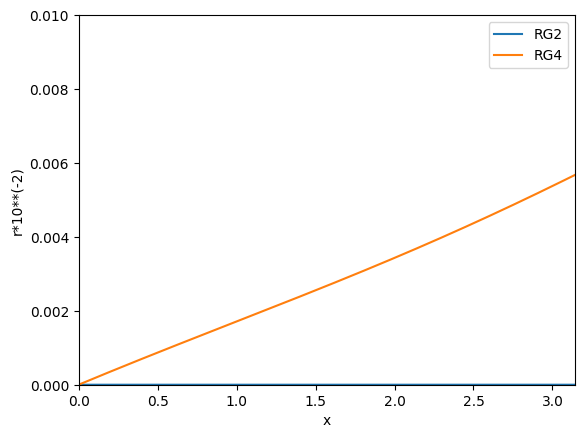

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

plt.xlim(0, xk)
plt.ylim(0, 0.01)
#plt.xticks(x_steps[0:122587:11000])
plt.xlabel('x')
plt.ylabel('r*10**(-2)')


plt.plot(x_steps_RG2, 10**2*np.array(r2_RG2))
plt.plot(x_steps_RG4, 10**2*np.array(r2_RG4))
plt.legend (('RG2', 'RG4'))
plt.show()


In [ ]:
##__________________________________________________________________-
y = np.array([B*np.pi, A*np.pi])
y_ = y
x = 0
x_ = 0
xk = np.pi
eps = 10**(-5)
#выбор начального шага:
s=4
delta = (1/(max(abs(x), abs(xk))))**((s + 1)) + np.linalg.norm(f(x, y))**((s + 1))
h = (eps/delta)**(1/(s + 1))
h_steps_ = []
h_eps = []
x_steps = []
n_iter = []
y_steps = []
y2_steps = []
error_ratio = []
r1 = []
r2 = []
Runge_Kutte_classic_4_auto(h, x, y, x_, y_, h_steps_, x_steps,y_steps, y2_steps, n_iter, eps, error_ratio, r1, r2, h_eps)
print(h_steps_)

y = np.array([B*np.pi, A*np.pi])
y_ = y
x = 0
x_ = 0
xk = np.pi
#выбор начального шага:
delta = (1/(max(abs(x), abs(xk))))**((3)) + np.linalg.norm(f(x, y))**((3))
h = (eps/delta)**(1/(3))
h_steps1 = []
x_steps1 = []
n_iter1 = []
y_steps1 = []
y2_steps1 = []
error_ratio1 = []
r11 = []
r22 = []
Runge_Kutte_auto(h, x, y, x_, y_, h_steps1, x_steps1, y_steps1, y2_steps1 , n_iter1, eps, error_ratio1, r11, r22, h_eps)

y_ =  [ 1.23254724 -1.44303536]
y_true =  [ 1.23254102 -1.44304161]
r =  6.095494310518587e-06
h_eps =  0.5034443773532205
iter =  9
---------------------------------------
[0.1258610943383051, 0.2517221886766102, 0.5034443773532205, 0.5034443773532205, 0.2517221886766102, 0.5034443773532205, 0.5034443773532205, 0.2517221886766102, 0.5034443773532205]
y_ =  [ 1.32103531 -1.33682624]
y_true =  [0.6738838483512934, -1.336692680814227]
iter =  37
r =  1.394244396052531e-05
h_eps =  0.053220591536493354
--------------------------------


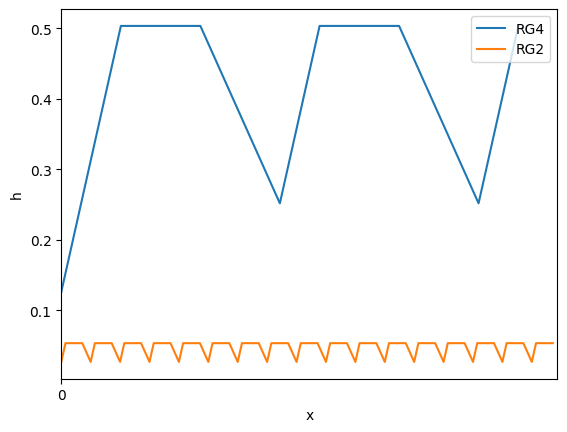

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

plt.xlim(0, xk)
#plt.ylim(0, 0.1)
plt.xticks(x_steps[0:122587:11000])
plt.xlabel('x')
plt.ylabel('h')
plt.title('')

plt.plot(x_steps, h_steps_)
plt.plot(x_steps1, h_steps1)
plt.legend (('RG4', 'RG2'))
plt.show()




In [ ]:
eps = 1
epss = []

n_iter, n_iter1 = [], []
for i in range (1,6):
  eps = 10**(-i)
  print("eps = ", eps)
  epss.append(eps)
  h_steps, x_steps, y_steps = [], [], []
  y2_steps, y2_steps1 = [], []

  h_steps1, x_steps1, y_steps1 = [], [], []
  error_ratio, error_ratio1 = [], []
  r1, r11 = [], []
  r2, r22 = [], []
  h_eps, h_eps1 = [], []
  y = np.array([B*np.pi, A*np.pi])
  y_ = y
  x = 0
  x_ = 0
  xk = np.pi
  c2 = ksi
  a = c2
  b = np.array([ 1/(2 * c2), 1 - 1/(2 * c2) ])
  #выбор начального шага:
  delta = (1/(max(abs(x), abs(xk))))**((s + 1)) + np.linalg.norm(f(x, y))**((s + 1))
  h = (eps/delta)**(1/(s + 1))
  Runge_Kutte_classic_4_auto(h, x, y, x_, y_, h_steps, x_steps, y_steps, y2_steps, n_iter, eps, error_ratio, r1, r2, h_eps)


  delta = (1/(max(abs(x), abs(xk))))**(s+1) + np.linalg.norm(f(x, y))**(s+1)
  h = (eps/delta)**(1/3)
  Runge_Kutte_auto(h, x, y, x_, y_, h_steps1, x_steps1, y_steps1, y2_steps1, n_iter1, eps, error_ratio1, r11, r22, h_eps1)

print("-------------------------------------------------------------------------------------------------------")





eps =  0.1
y_ =  [-0.12757717 -1.94266728]
y_true =  [-0.18974817 -2.00407431]
r =  0.06059329637945239
h_eps =  3.1765192742827235
iter =  3
---------------------------------------
y_ =  [ 1.21380037 -1.47220742]
y_true =  [0.5708197382922341, -1.4469444694122684]
iter =  3
r =  0.030518371716845204
h_eps =  1.3620169162796376
--------------------------------
eps =  0.01
y_ =  [ 1.18154804 -1.49772711]
y_true =  [ 1.17514766 -1.50421688]
r =  0.00631610605219574
h_eps =  2.004248165991578
iter =  3
---------------------------------------
y_ =  [ 1.18694829 -1.49310602]
y_true =  [0.5298287280774869, -1.4876174359510812]
iter =  6
r =  0.007121451154707925
h_eps =  0.6321922509795277
--------------------------------
eps =  0.001
y_ =  [ 1.19225503 -1.48664612]
y_true =  [ 1.19120528 -1.48735682]
r =  0.0012294087389020784
h_eps =  0.6322975502466717
iter =  4
---------------------------------------
y_ =  [ 1.31650621 -1.34274617]
y_true =  [0.6695244875723291, -1.3415983279689283]
iter

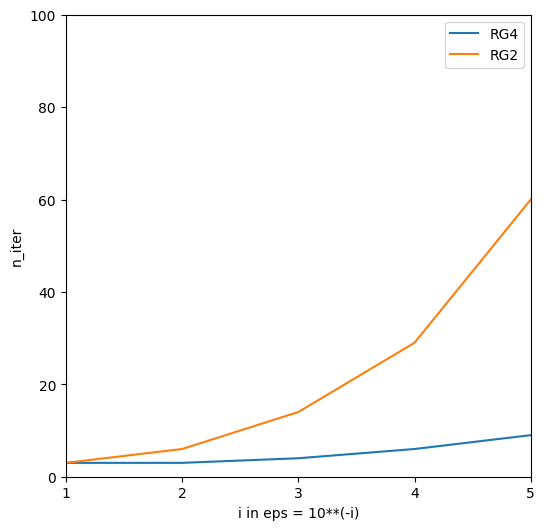

In [ ]:

epss = [1, 2, 3, 4, 5]
plt.figure(figsize =(6, 6))
plt.xlim(1, 5)
plt.ylim(0, 100)
plt.xticks(epss)
#plt.yticks(n_iter)

plt.plot(epss, n_iter)
plt.plot(epss, n_iter1)
plt.xlabel('i in eps = 10**(-i)')
plt.ylabel('n_iter')
plt.title('')
plt.legend (('RG4', 'RG2'))
plt.show()

In [ ]:
R = 1
eps = 10**(-5)
#выбор начального шага:
delta = (1/(max(abs(x), abs(xk))))**((s + 1)) + np.linalg.norm(f(x, y))**((s + 1))
h = (eps/delta)**(1/(s + 1))
while (R >= eps):
  y = np.array([B*np.pi, A*np.pi])
  y_ = y
  x = 0
  x_ = 0
  xk = np.pi
  eps = 10**(-4)
  h_steps, x_steps = [], []
  y1_steps, y2_steps = [], []
  n_iter = []
  error_ratio = []
  r1, r2 = [], []
  Runge_Kutte_classic_4_auto(h, x, y, x_, y_, h_steps, x_steps, y1_steps, y2_steps, n_iter, eps, error_ratio, r1, r2, h_eps)
  R = np.linalg.norm(y1_steps[-1] - y2_steps[-1]) / (2**(s+1)-1)



y = np.array([B*np.pi, A*np.pi])
y_ = y
x = 0
x_ = 0
xk = np.pi
#выбор начального шага:
delta = (1/(max(abs(x), abs(xk))))**((s + 1)) + np.linalg.norm(f(x, y))**((s + 1))
h = (eps/delta)**(1/(s + 1))
h_steps1 = []
x_steps1 = []
y1_steps1, y2_steps1 = [], []
n_iter1 = []
error_ratio1 = []
r11 = []
r22 = []
h_eps
Runge_Kutte_auto(h, x, y, x_, y_, h_steps1, x_steps1, y1_steps1, y2_steps1, n_iter1, eps, error_ratio1, r11, r22, h_eps)

y_ =  [ 1.23257701 -1.44300551]
y_true =  [ 1.23255592 -1.44301782]
r =  3.566784693953922e-05
h_eps =  0.5034443773532205
iter =  8
---------------------------------------
y_ =  [ 1.35762812 -1.28803303]
y_true =  [ 1.35762097 -1.28804374]
iter =  33
r =  4.60541885967659e-05
h_eps =  0.09973819580624288
--------------------------------


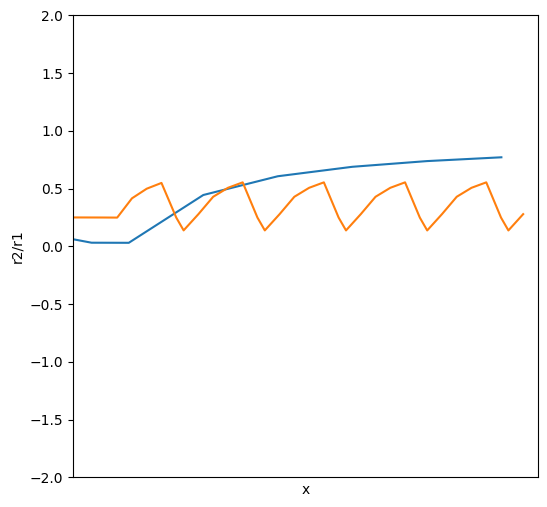

In [ ]:
plt.figure(figsize =(6, 6))

plt.xlim(0, xk)
plt.ylim(-2, 2)
plt.xticks(x_steps[12000:122587:100])

plt.plot(x_steps, np.array(r2)/np.array(r1))
plt.plot(x_steps1,  np.array(r22)/np.array(r11))
plt.xlabel('x')
plt.ylabel('r2/r1')
plt.title('')
plt.show()

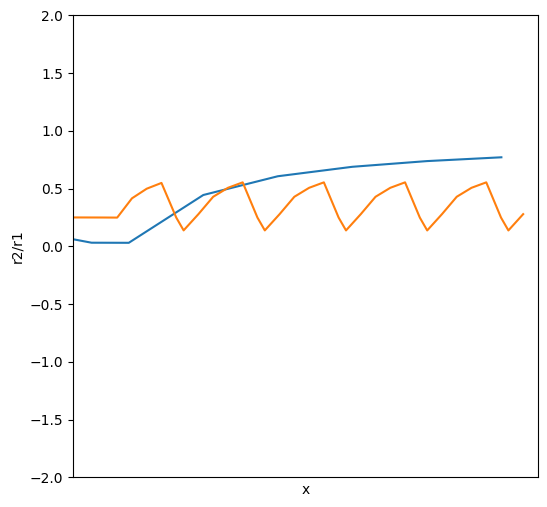

In [ ]:
plt.figure(figsize =(6, 6))

plt.xlim(0, xk)
plt.ylim(-2, 2)
plt.xticks(x_steps[12000:122587:100])

plt.plot(x_steps, np.array(r2)/np.array(r1))
plt.plot(x_steps1,  np.array(r22)/np.array(r11))
plt.xlabel('x')
plt.ylabel('r2/r1')
plt.title('')
plt.show()

In [ ]:
R = 1
#выбор начального шага:
delta = (1/(max(abs(x), abs(xk))))**((s + 1)) + np.linalg.norm(f(x, y))**((s + 1))
h = (eps/delta)**(1/(s + 1))
while (R >= eps):
  y = np.array([B*np.pi, A*np.pi])
  y_ = y
  x = 0
  x_ = 0
  xk = np.pi
  eps = 10**(-4)
  h_steps, x_steps = [], []
  y1_steps, y2_steps = [], []
  n_iter = []
  error_ratio = []
  r1, r2 = [], []
  h_eps = 0
  Runge_Kutte_classic_4_auto(h, x, y, x_, y_, h_steps, x_steps, y1_steps, y2_steps, n_iter, eps, error_ratio, r1, r2, h_eps)
  R = np.linalg.norm(y1_steps[-1] - y2_steps[-1]) / (2**(s+1)-1)
  h = h_eps

R = 1
while (R >= eps):
  y = np.array([B*np.pi, A*np.pi])
  y_ = y
  x = 0
  x_ = 0
  xk = np.pi
  #выбор начального шага:
  delta = (1/(max(abs(x), abs(xk))))**((s + 1)) + np.linalg.norm(f(x, y))**((s + 1))
  h = (eps/delta)**(1/(s + 1))
  h_steps1 = []
  x_steps1 = []
  y1_steps1, y2_steps1 = [], []
  n_iter1 = []
  error_ratio1 = []
  r11 = []
  r22 = []
  Runge_Kutte_auto(h, x, y, x_, y_, h_steps1, x_steps1, y1_steps1, y2_steps1, n_iter1, eps, error_ratio1, r11, r22, h_eps)
  R = np.linalg.norm(y1_steps[-1] - y2_steps[-1]) / (2**(s+1)-1)
  h = h_eps